
#  IDS706 Data Engineer

##  Weekly Mini Project 9: Cloud-hosted Notebook


# Data Analysis
### Notice: My data was collected on 26th October. Override my data may cause errors in my data analysis.

## Pre-prepare

In [8]:
!pip install --upgrade pip
!pip install scipy
!pip install matplotlib
!pip install seaborn
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

# versions below 0.8.1
import seaborn as sns #sets up styles and gives us more plotting options
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [9]:
# read and display the data
dfmovies = pd.read_csv('https://raw.githubusercontent.com/nogibjj/IDS706-MiniProject9-Cloud-Hosted-Notebook/main/MaoyanTop100.csv')
dfmovies.head()

,Title,Director,Actors,Rating,Income(万),Duration(分钟),Type
0,我不是药神,文牧野,"徐峥,周一围,王传君",9.6,310002,117,"剧情,喜剧"
1,肖申克的救赎,弗兰克·德拉邦特,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",9.5,暂无,142,"剧情,犯罪"
2,绿皮书,彼得·法雷里,"维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼",9.5,47872,130,"剧情,喜剧,传记"
3,海上钢琴师,朱塞佩·托纳多雷,"蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世",9.3,14376,126,"剧情,爱情,音乐"
4,哪吒之魔童降世,饺子,"吕艳婷,囧森瑟夫,瀚墨",9.6,503570,110,"动画,喜剧,奇幻"


## Director with respect to Top100

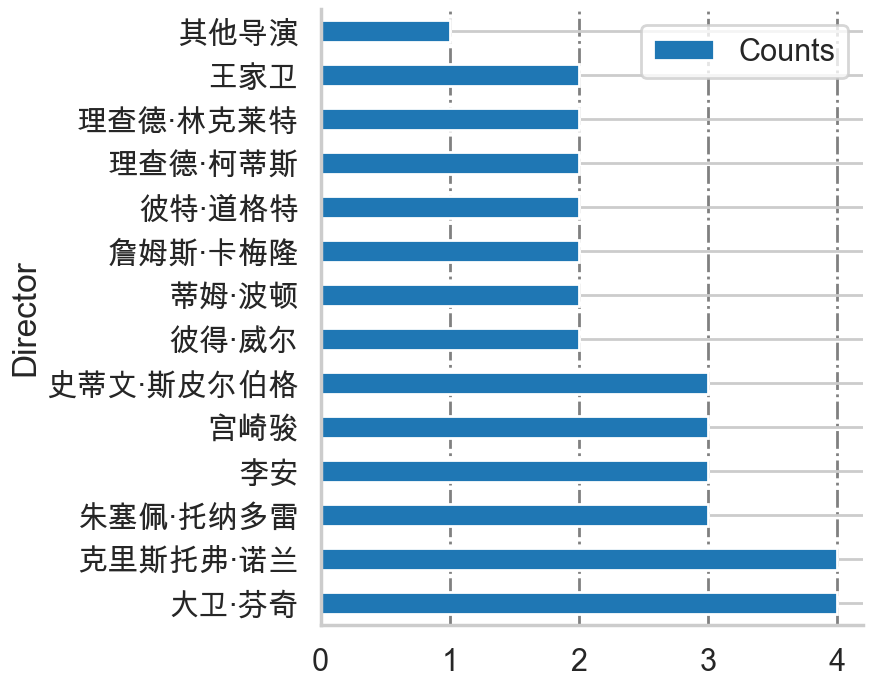

In [12]:
# To support Chinese
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_context("poster")
sns.set_style("whitegrid", {'font.sans-serif': ['Arial Unicode MS', 'Arial']})

# process director
director_count = pd.DataFrame(dfmovies.value_counts("Director")) # count director
director_count = director_count.reset_index()
director_count.columns = ['Director', 'Counts']
director_count = director_count[director_count['Counts'] > 1] # director with more than one movie only
# director_count = director_count.append({"Director":"其他导演","Counts":1}, ignore_index=True)
new_row = pd.DataFrame({"Director":["其他导演"], "Counts":[1]})
director_count = pd.concat([director_count, new_row], ignore_index=True)

# plot figure
plt.rcParams['figure.figsize']=[7,8]
director_count.plot(y='Counts',x='Director',kind="barh")
plt.grid(axis = 'x', color ='gray', linestyle='dashdot')
sns.despine()
plt.show()

## Actors with respect to Top100

In [13]:
# process actor data
all_actor = dfmovies['Actors'].str.split(',').apply(pd.Series) # separate actor
all_actor = all_actor.apply(pd.value_counts).fillna('0') # fill NaN with 0
all_actor.columns = ['actor1', 'actor2', 'actor3']
all_actor['actor1'] = all_actor['actor1'].astype(int)
all_actor['actor2'] = all_actor['actor2'].astype(int)
all_actor['actor3'] = all_actor['actor3'].astype(int)
# count all actors
all_actor['all_counts'] = all_actor['actor1'] + all_actor['actor2'] + all_actor['actor3']
# sort by amount
all_actor = all_actor.sort_values(['all_counts'], ascending=False)
# delete actors only appear once
all_actor = all_actor[all_actor['all_counts'] > 1] # actor with more than one movie only

/var/folders/n8/dnrgzv2965j2tgqwwsr5zwch0000gn/T/ipykernel_22181/1265053781.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_actor = all_actor.apply(pd.value_counts).fillna('0') # fill NaN with 0
/var/folders/n8/dnrgzv2965j2tgqwwsr5zwch0000gn/T/ipykernel_22181/1265053781.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_actor = all_actor.apply(pd.value_counts).fillna('0') # fill NaN with 0
/var/folders/n8/dnrgzv2965j2tgqwwsr5zwch0000gn/T/ipykernel_22181/1265053781.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  all_actor = all_actor.apply(pd.value_counts).fillna('0') # fill NaN with 0


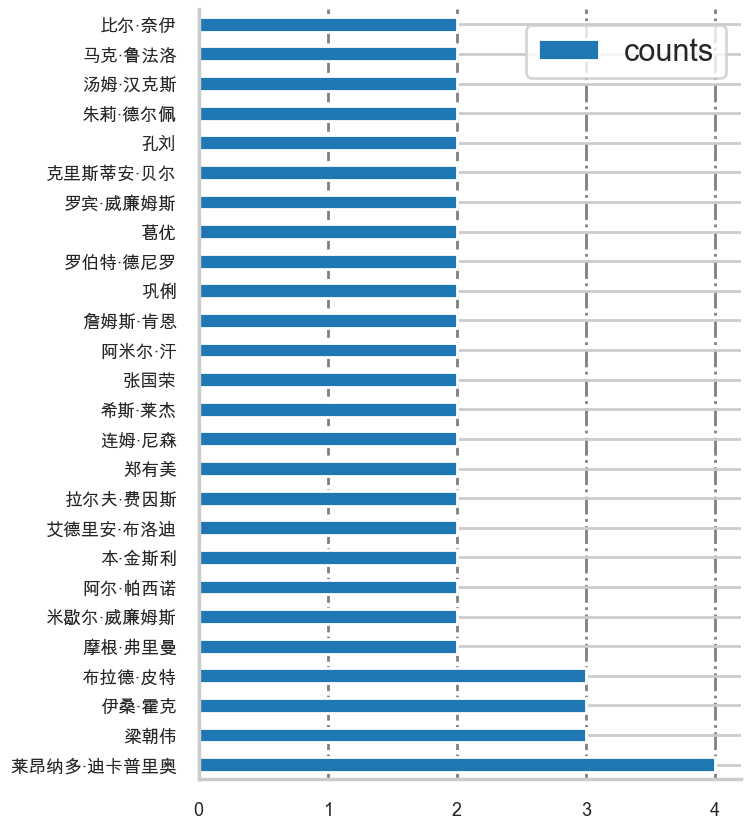

In [14]:
# To support Chinese
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_context("poster")
sns.set_style("whitegrid", {'font.sans-serif': ['Arial Unicode MS', 'Arial']})
# count all actors
actor_count = pd.DataFrame({'counts':all_actor['all_counts']})
# plot figure
plt.rcParams['figure.figsize']=[7,10]
actor_count.plot(kind="barh",fontsize=13)
plt.grid(axis = 'x', color ='gray', linestyle='dashdot')
sns.despine()
plt.show()

## Rating with respect to Top100


In [15]:
# handle rating, delete duplicates and sort
data1=dfmovies.drop_duplicates(['Rating'])
rating_data = pd.DataFrame(dfmovies.drop_duplicates(['Rating']))
rating_data.sort_values("Rating",inplace=True)
rating_data

,Title,Director,Actors,Rating,Income(万),Duration(分钟),Type
38,请以你的名字呼唤我,卢卡·瓜达尼诺,"提莫西·查拉梅,艾米·汉莫,迈克尔·斯图巴",8.0,暂无,132,"爱情,剧情"
6,小偷家族,是枝裕和,"中川雅也,安藤樱,松冈茉优",8.1,9675,121,"剧情,犯罪"
45,西西里的美丽传说,朱塞佩·托纳多雷,"莫妮卡·安娜·玛丽亚·贝鲁奇,朱塞佩·苏尔法罗,玛蒂尔德·皮亚纳",8.2,暂无,109,"剧情,爱情,战争"
47,让子弹飞,姜文,"姜文,周润发,葛优",8.4,63675,132,"剧情,喜剧,动作,西部"
35,被嫌弃的松子的一生,中岛哲也,"中谷美纪,永山瑛太,伊势谷友介",8.5,暂无,130,"剧情,歌舞"
21,小丑,托德·菲利普斯,"华金·菲尼克斯,罗伯特·德尼罗,亚历克·鲍德温",8.6,暂无,122,"剧情,惊悚,犯罪"
39,死亡诗社,彼得·威尔,"罗宾·威廉姆斯,伊桑·霍克,柯特伍德·史密斯",8.7,暂无,128,剧情
29,熔炉,黄东赫,"孔刘,郑有美,金智英",8.8,暂无,125,剧情
13,楚门的世界,彼得·威尔,"金·凯瑞,劳拉·琳妮,诺亚·艾默里奇",8.9,暂无,103,剧情
9,盗梦空间,克里斯托弗·诺兰,"莱昂纳多·迪卡普里奥,渡边谦,约瑟夫·高登-莱维特",9.0,49620,148,"动作,悬疑,惊悚,科幻"


In [16]:
# rating and its corresponding amount
rating_count=pd.DataFrame(data1['Rating'],columns=['Rating'])
rating_count['count']=[len(dfmovies[dfmovies['Rating']==8.0]),
            len(dfmovies[dfmovies['Rating']==8.1]),
            len(dfmovies[dfmovies['Rating']==8.2]),
            len(dfmovies[dfmovies['Rating']==8.4]),
            len(dfmovies[dfmovies['Rating']==8.5]),
            len(dfmovies[dfmovies['Rating']==8.6]),
            len(dfmovies[dfmovies['Rating']==8.7]),
            len(dfmovies[dfmovies['Rating']==8.8]),
            len(dfmovies[dfmovies['Rating']==8.9]),
            len(dfmovies[dfmovies['Rating']==9.0]),
            len(dfmovies[dfmovies['Rating']==9.1]),
            len(dfmovies[dfmovies['Rating']==9.2]),
            len(dfmovies[dfmovies['Rating']==9.3]),
            len(dfmovies[dfmovies['Rating']==9.4]),
            len(dfmovies[dfmovies['Rating']==9.5]),
            len(dfmovies[dfmovies['Rating']==9.6]),
            len(dfmovies[dfmovies['Rating']==9.8])
           ]
rating_count.sort_values("Rating",inplace=True)
rating_count

,Rating,count
38,8.0,7
6,8.1,2
45,8.2,3
47,8.4,1
35,8.5,12
21,8.6,7
39,8.7,4
29,8.8,7
13,8.9,12
9,9.0,7


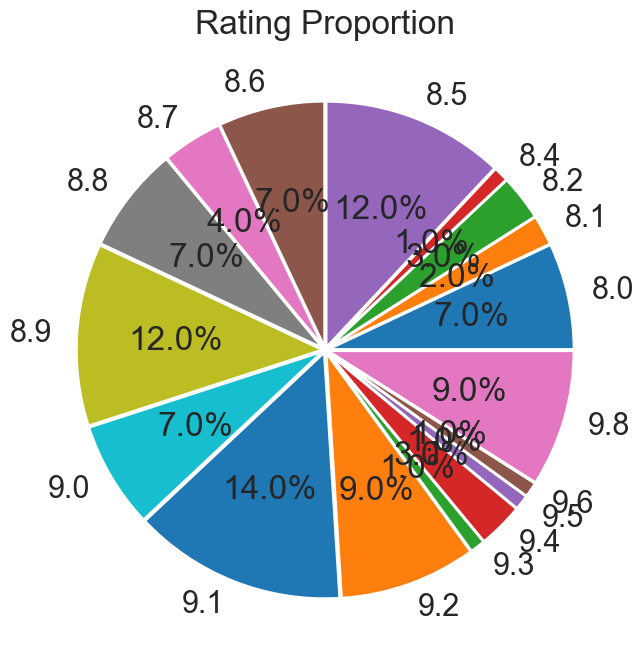

In [17]:
plt.figure(figsize=(8,8))
label=rating_count['Rating'].values.tolist()
explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
plt.pie(x=rating_count['count'].values.tolist(),explode=explode,labels=label,autopct='%1.1f%%')
plt.title('Rating Proportion')
plt.show()

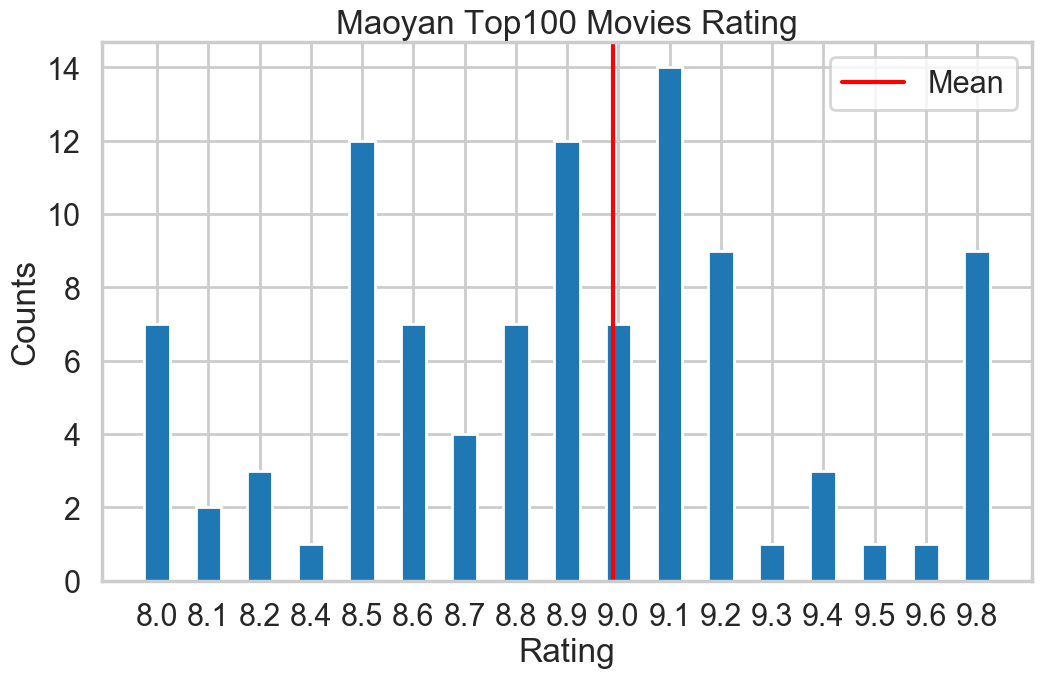

In [18]:
# plot histogram
plt.rcParams['figure.figsize']=[12,7]
rating_x=rating_count["Rating"].values.tolist() # 
plt.bar(range(17),rating_count["count"].values.tolist(),width=0.5)
plt.axvline(rating_count.Rating.mean(), 0, 1, color='r', label='Mean') # calculate and plot mean value
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.xticks(range(17),rating_x)
plt.title("Maoyan Top100 Movies Rating")
plt.legend()
plt.show()

<Axes: >

<Figure size 900x1200 with 0 Axes>

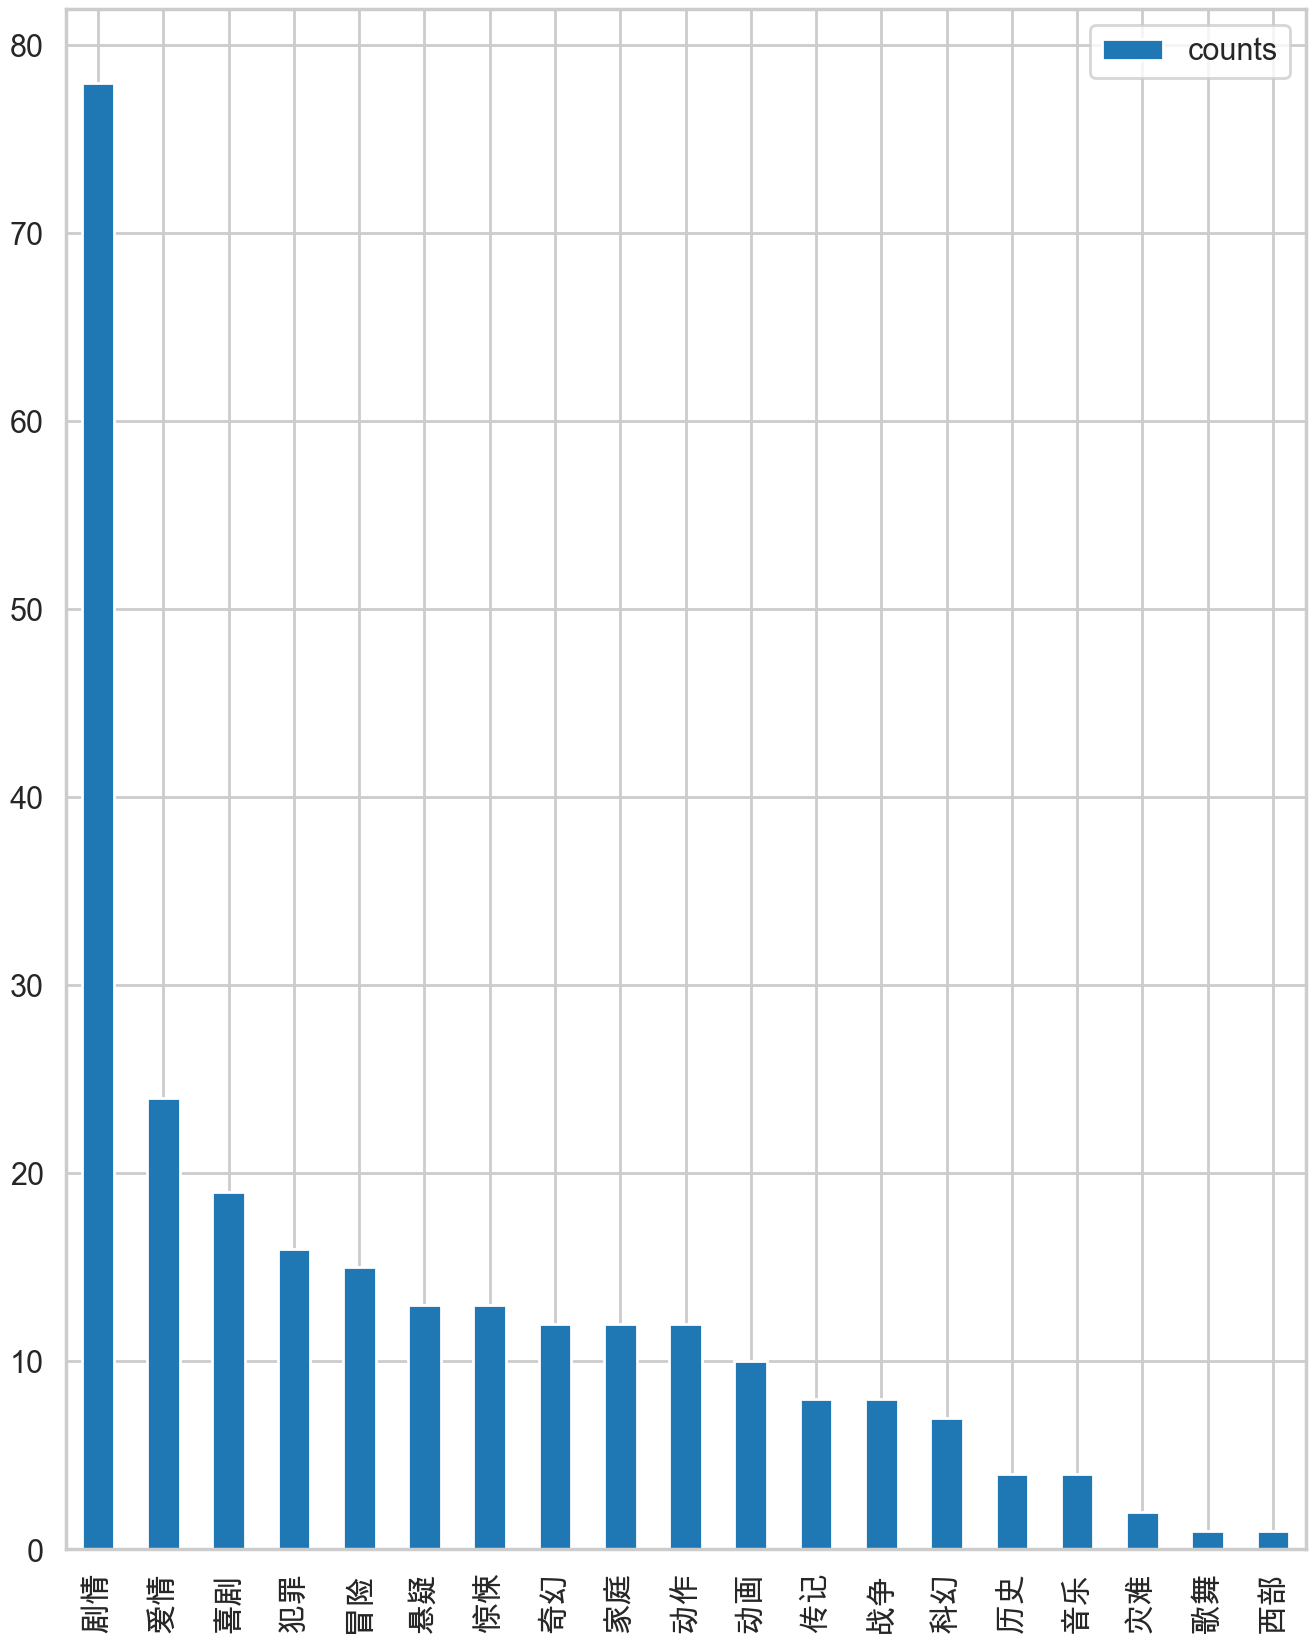

In [28]:
# To support Chinese
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_context("poster")
sns.set_style("whitegrid", {'font.sans-serif': ['Arial Unicode MS', 'Arial']})
# plot type
type_count = pd.DataFrame({'counts':all_type['all_counts']})
sns.despine()
type_count.sort_values(by='counts',ascending=False).plot(kind='bar',figsize=(16,6))

# Conclusion

In brief, different factors have different impacts on a movie to be one of the Top100 movies in Maoyan. Rank (with low, medium, high) these factors from analysis and classify as below:

(Low) Directors have few effects on Top100 movies.

(Low) Actors also have a negligible effect on Top100 movies.

(High) The rating has a significant impact on Top100 movies.

(High) The type of movie also has a considerable effect on Top100 movies.

Moreover, a top film may not have a high cumulative income.

In conclusion, we could predict that director or actors have a rare impact on being a good movie; duration might have effects on being a high-quality movie; rating and type may significantly affect whether a film would be on the Top100 list. Last but not least, a Top100 movie cannot guarantee a high income [2]. Based on the analysis, some new movies with high factors have more chance to appear in the Top100 list, while some old movies will disappear in the future. Also, several classical films will still live on the list for a long time [1].

# Reference

[1] Film-tech.com http://www.film-tech.com/ubb/f12/t000142.html

[2] Investopedia.com https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp